# Morphological Operations
Erostion : it erodes (make it weak) away the boundaries of foreground object 
and set a pixel at (i, j) to the minimum over all pixels in the neighborhood centered at (i, j), notice how the white boundary of the image below disappears or gets eroded.

Dilation: sets a pixel at (i, j) to the maximum over all pixels in the neighborhood centered at (i, j). Dilation enlarges bright regions and shrinks dark regions , notice how the white boundary of the image thickens, or gets dilated.

Opening: defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks.

Closing : defined as a dilation followed by an erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.

 White tophat:  defined as the image minus its morphological opening. This operation returns the bright spots of the image that are smaller than the structuring element.
 
 Black tophat: defined as its morphological closing minus the original image. This operation returns the dark spots of the image that are smaller than the structuring element.

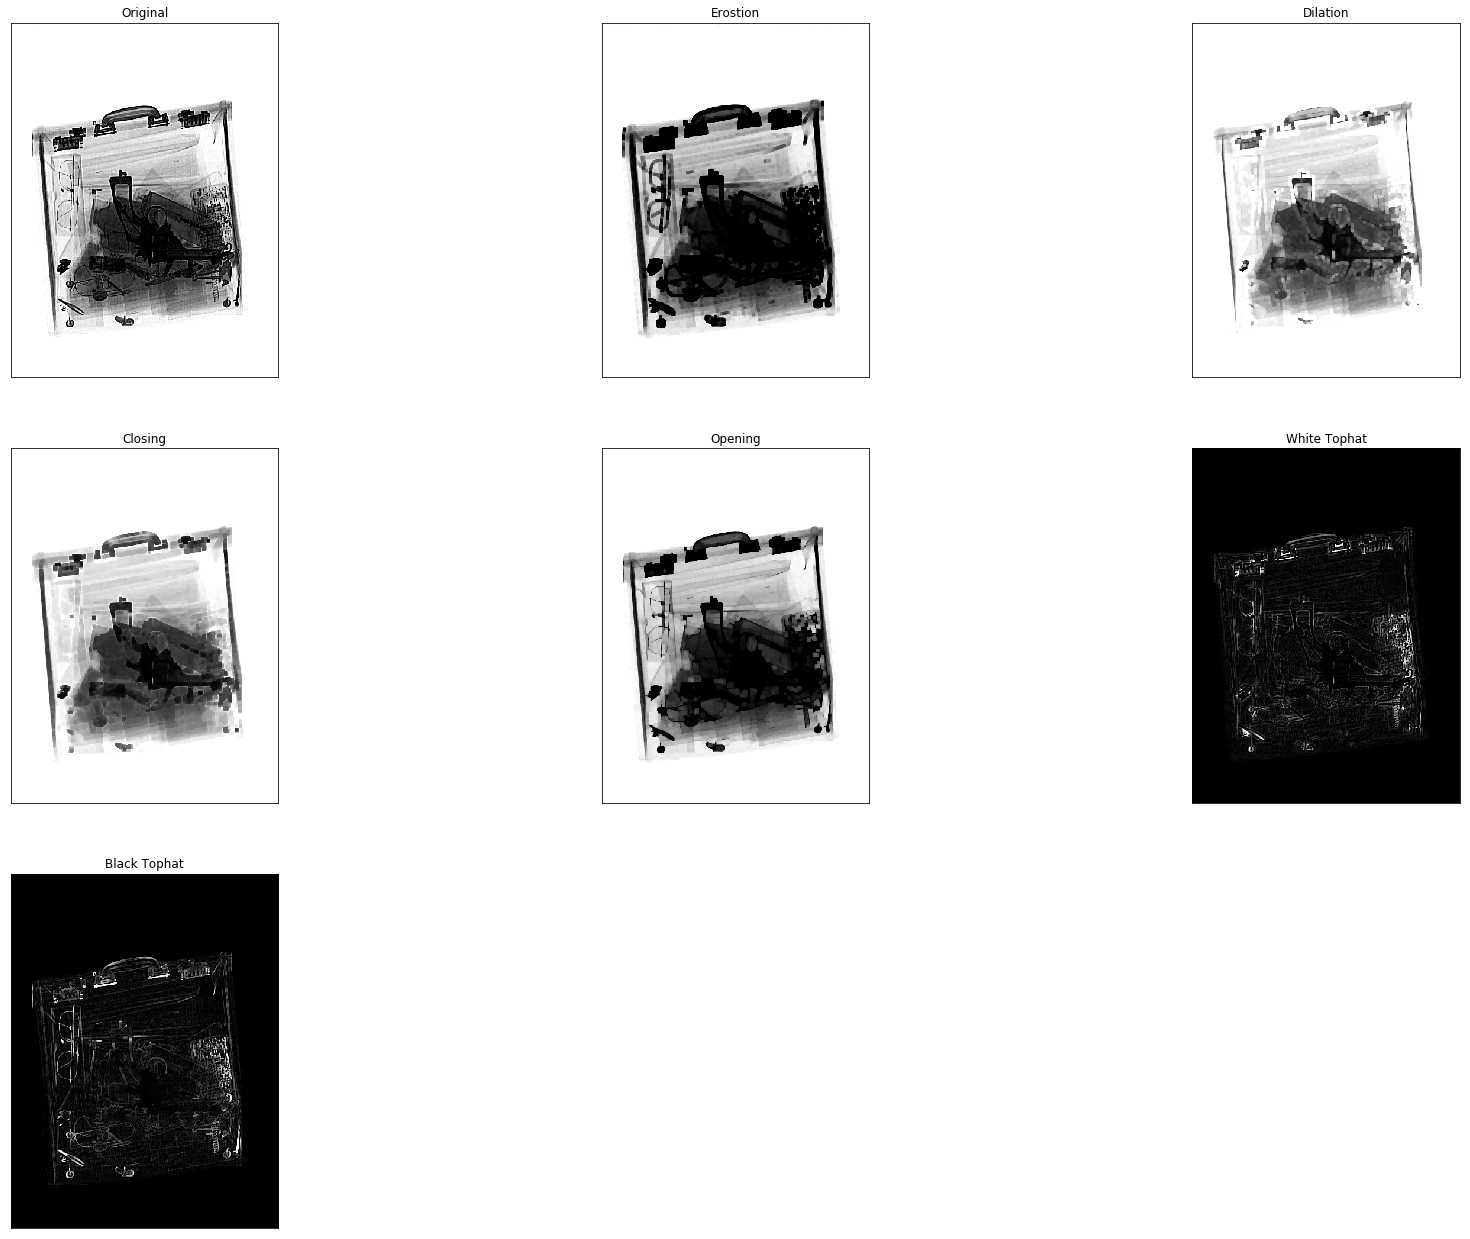

In [48]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize, convex_hull_image
from skimage import io
from skimage.data import data_dir
from skimage.util import img_as_ubyte

image = io.imread(os.path.join("images", "gun2.tif"),as_grey=True)
#image=io.imread(os.path.join(os.data_dir, "images/gun.tif"),as_grey=True)

#image= cv2.imread("images/gun.tif",0)


kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(image,kernel,iterations = 1)

dilation = cv2.dilate(image,kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN, kernel)
white_tophat=cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
black_tophat=cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

#binary_image= cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

#skeltonize=skeletonize(binary_image)
#convex = convex_hull_image(binary_image)


filter_name=["Original","Erostion","Dilation","Closing","Opening","White Tophat","Black Tophat"]


filters = [image,erosion,dilation,closing,opening,white_tophat,black_tophat]
fig = plt.figure(figsize=(30,30))

for i in range(7):
    plt.subplot(4,3,i+1),plt.imshow(filters[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()